<a href="https://colab.research.google.com/github/hsleonis/cancer-analysis/blob/master/cancer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Cancer Analysis

In [0]:
### Some imports
import numpy as np               # efficient matrix-vector operations
import numpy.linalg as la        # linear algebra (solvers etc.)
import pandas as pd              # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns            # data visualization
import matplotlib.pyplot as plt  # basic plotting

In [61]:
# import dataset
df = pd.read_csv('https://drive.google.com/uc?id=1-ZeH2bMqmqRBo3t9wAuT4JixE9qOKZaa')

# set target labels
labels = df['diagnosis']

# drop first unnamed column
df.drop(df.columns[0], axis=1, inplace=True)

# drop labels
df.drop(['diagnosis'], axis=1, inplace=True)

# check dataset
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,precondition
0,18.770,21.43,122.90,1092.0,0.09116,0.14020,0.10600,0.060900,0.1953,0.06083,0.6422,1.530,4.369,88.25,0.007548,0.03897,0.03914,0.018160,0.02168,0.004445,24.54,34.37,161.10,1873.0,0.1498,0.48270,0.4634,0.20480,0.3679,0.09870,lung
1,13.610,24.69,87.76,572.6,0.09258,0.07862,0.05285,0.030850,0.1761,0.06130,0.2310,1.005,1.752,19.83,0.004088,0.01174,0.01796,0.006880,0.01323,0.001465,16.89,35.64,113.20,848.7,0.1471,0.28840,0.3796,0.13290,0.3470,0.07900,heart
2,12.270,17.92,78.41,466.1,0.08685,0.06526,0.03211,0.026530,0.1966,0.05597,0.3342,1.781,2.079,25.79,0.005888,0.02310,0.02059,0.010750,0.02578,0.002267,14.10,28.88,89.00,610.2,0.1240,0.17950,0.1377,0.09532,0.3455,0.06896,lung
3,11.340,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.025940,0.1927,0.06211,0.2430,1.010,1.491,18.19,0.008577,0.01641,0.02099,0.011070,0.02434,0.001217,12.47,23.03,79.15,478.6,0.1483,0.15740,0.1624,0.08542,0.3060,0.06783,heart
4,9.683,19.34,61.05,285.7,0.08491,0.05030,0.02337,0.009615,0.1580,0.06235,0.2957,1.363,2.054,18.24,0.007440,0.01123,0.02337,0.009615,0.02203,0.004154,10.93,25.59,69.10,364.2,0.1199,0.09546,0.0935,0.03846,0.2552,0.07920,heart


In [62]:
# check data for cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [63]:
# check distribution of diagnosis
labels.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [64]:
# one hot encoding of precondition
new_df = pd.get_dummies(df)
new_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,precondition_heart,precondition_lung,precondition_other
0,18.770,21.43,122.90,1092.0,0.09116,0.14020,0.10600,0.060900,0.1953,0.06083,0.6422,1.530,4.369,88.25,0.007548,0.03897,0.03914,0.018160,0.02168,0.004445,24.54,34.37,161.10,1873.0,0.1498,0.48270,0.4634,0.20480,0.3679,0.09870,0,1,0
1,13.610,24.69,87.76,572.6,0.09258,0.07862,0.05285,0.030850,0.1761,0.06130,0.2310,1.005,1.752,19.83,0.004088,0.01174,0.01796,0.006880,0.01323,0.001465,16.89,35.64,113.20,848.7,0.1471,0.28840,0.3796,0.13290,0.3470,0.07900,1,0,0
2,12.270,17.92,78.41,466.1,0.08685,0.06526,0.03211,0.026530,0.1966,0.05597,0.3342,1.781,2.079,25.79,0.005888,0.02310,0.02059,0.010750,0.02578,0.002267,14.10,28.88,89.00,610.2,0.1240,0.17950,0.1377,0.09532,0.3455,0.06896,0,1,0
3,11.340,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.025940,0.1927,0.06211,0.2430,1.010,1.491,18.19,0.008577,0.01641,0.02099,0.011070,0.02434,0.001217,12.47,23.03,79.15,478.6,0.1483,0.15740,0.1624,0.08542,0.3060,0.06783,1,0,0
4,9.683,19.34,61.05,285.7,0.08491,0.05030,0.02337,0.009615,0.1580,0.06235,0.2957,1.363,2.054,18.24,0.007440,0.01123,0.02337,0.009615,0.02203,0.004154,10.93,25.59,69.10,364.2,0.1199,0.09546,0.0935,0.03846,0.2552,0.07920,1,0,0


In [0]:
# split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df, labels, test_size=.33, random_state=42)

In [66]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Accuracy Scores
print("Train accuracy: ", round(clf.score(X_train, y_train), 4))
print("Test accuracy: ", round(clf.score(X_test, y_test), 4))

Train accuracy:  1.0
Test accuracy:  0.9521


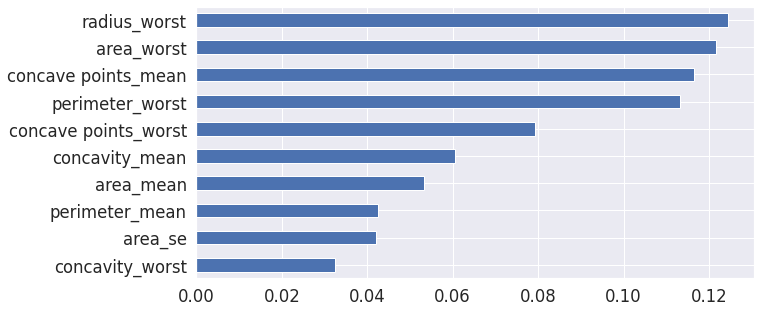

In [67]:
# Feature importance
feature_importance = pd.Series(clf.feature_importances_, index=new_df.columns).sort_values()
plt.figure(figsize=(10, 5))
feature_importance[-10:].plot(kind='barh')

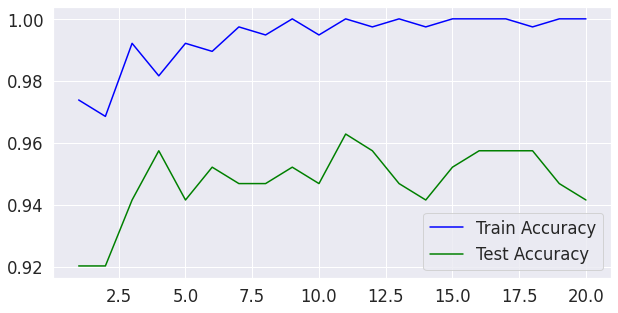

In [68]:
# training and testing accuracy depending on the number of trees
train_acc, test_acc = [], []

for i in range(1, 21):
  clf = RandomForestClassifier(n_estimators=i)
  clf.fit(X_train, y_train)
  
  train_acc.append(round(clf.score(X_train, y_train), 4))
  test_acc.append(round(clf.score(X_test, y_test), 4))

x_ax = [i for i in range(1, 21)]
plt.figure(figsize=(10, 5))
plt.plot(x_ax, train_acc, label="Train Accuracy", color='blue')
plt.plot(x_ax, test_acc, label="Test Accuracy", color='green')
plt.legend(loc='lower right')
plt.show()

In [76]:
# import Logistic Regression
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression(max_iter=10000, dual=False, solver='lbfgs')
clf2.fit(X_train, y_train)

# Accuracy Scores
print("Train accuracy: ", round(clf2.score(X_train, y_train), 4))
print("Test accuracy: ", round(clf2.score(X_test, y_test), 4))

Train accuracy:  0.9711
Test accuracy:  0.9574


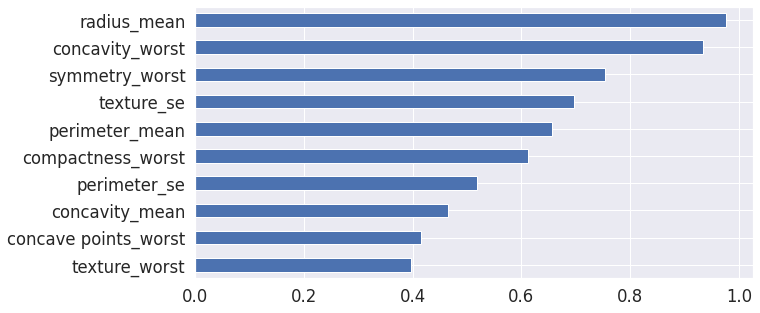

In [77]:
# Feature importance
feature_importance = pd.Series(np.abs(clf.coef_[0]), index=new_df.columns).sort_values()
plt.figure(figsize=(10, 5))
feature_importance[-10:].plot(kind='barh')

# Compare Machine Learning Algorithms Consistently

The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is evaluated in the same way on the same data.

We can achieve this by forcing each algorithm to be evaluated on a consistent test harness.

Different algorithms are compared below:

    1. Logistic Regression
    2. Linear Discriminant Analysis
    3. K-Nearest Neighbors
    4. Classification and Regression Trees
    5. Naive Bayes
    6. Support Vector Machines
    7. Random Forest

The 10-fold cross validation procedure is used to evaluate each algorithm, importantly configured with the same random seed to ensure that the same splits to the training data are performed and that each algorithms is evaluated in precisely the same way.

Each algorithm is given a short name, useful for summarizing results afterward.

LR: 0.950752 (0.020591)
LDA: 0.957832 (0.027389)
KNN: 0.929699 (0.020762)
CART: 0.931454 (0.026560)
NB: 0.933208 (0.038290)
SVM: 0.917419 (0.032351)
RF: 0.964850 (0.029357)


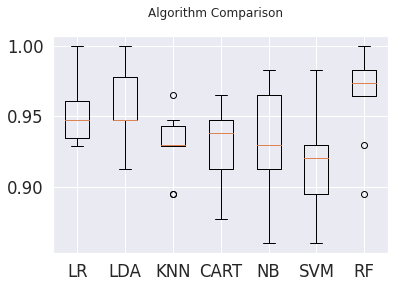

In [82]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# prepare configuration for cross validation test harness
seed = 42
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)

# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=10000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	cv_results = model_selection.cross_val_score(model, new_df, labels, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()